# understand through implementation: hopfield model in numpy

Shaobo Guan
2018-0515

In [1]:
% matplotlib inline
import importlib
import numpy as np
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocess

import utils
import hopfield_net

## Prepare data

... loading data


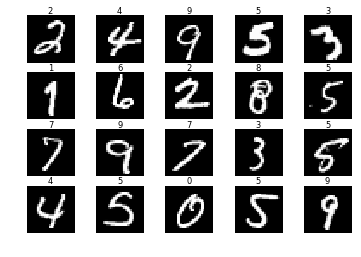

In [2]:
# load nmist data
(X_dtr, y_dtr), (X_dvl, y_dvl), (X_dts, y_dts) = utils.load_data()

# unravel data for doing convolution:
X_dtr = utils.data_unravel(X_dtr)[:, :, :, None]
X_dvl = utils.data_unravel(X_dvl)[:, :, :, None]
X_dts = utils.data_unravel(X_dts)[:, :, :, None]



# one hot encoding of labels
ohe = preprocess.OneHotEncoder(sparse=False)
ohe.fit(y_dtr[:, None])
Y_dtr = ohe.transform(y_dtr[:, None])
Y_dvl = ohe.transform(y_dvl[:, None])
Y_dts = ohe.transform(y_dts[:, None])

# plot example data
importlib.reload(utils)
h_fig, h_ax = plt.subplots(nrows=4, ncols=5)
for ax in h_ax.ravel():
    plt.axes(ax)
    utils.data_plot(X_dtr, y_dtr)
plt.show()
plt.close('all')


In [3]:
X_dtr.shape

(50000, 28, 28, 1)

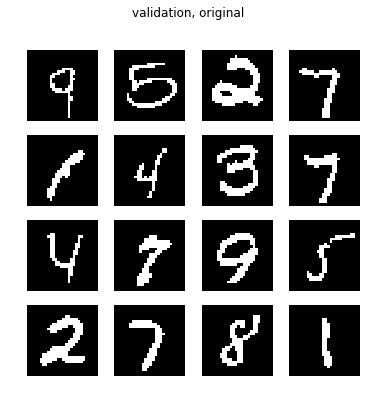

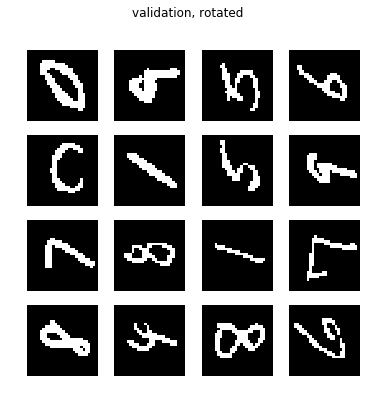

In [4]:
X_dvl_flp = X_dvl[:, :, ::-1]
X_dvl_rot = (np.rot90(X_dvl, k=1, axes=[1,2]))

X_tr = np.reshape(X_dtr, [X_dtr.shape[0], -1])
X_vl = np.reshape(X_dvl, [X_dvl.shape[0], -1])
X_vl_rot = np.reshape(X_dvl_rot, [X_dvl_rot.shape[0], -1])

X_tr = utils.data_binarize(X_tr, threshold=0.5, states='-1,1')
X_vl = utils.data_binarize(X_vl, threshold=0.5, states='-1,1')
X_vl_rot = utils.data_binarize(X_vl_rot, threshold=0.5, states='-1,1')


utils.data_plot(X_vl, n=16)
plt.suptitle('validation, original')
plt.gcf().set_size_inches(6,6)


utils.data_plot(X_vl_rot, n=16)
plt.suptitle('validation, rotated')
plt.gcf().set_size_inches(6,6)


## Hopfield model

In [533]:
importlib.reload(hopfield_net)

<module 'hopfield_net' from '/shared/homes/sguan/Coding_Projects/DynamicNN/hopfield_net.py'>

In [534]:
model = hopfield_net.HopfieldNet(X_tr.shape[1])
model.train_Hebbian(X=X_tr[:10])

In [10]:
E_tr = model.cal_energy(X_tr)
E_vl = model.cal_energy(X_vl)
E_vl_rot = model.cal_energy(X_vl_rot)

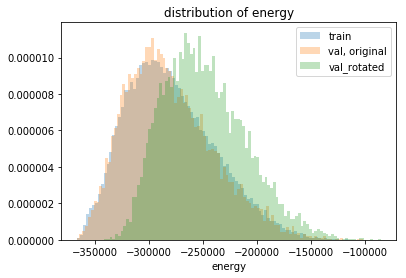

In [11]:
plt.hist(E_tr, bins=100, density=True, alpha=0.3)
plt.hist(E_vl, bins=100, density=True, alpha=0.3)
plt.hist(E_vl_rot, bins=100, density=True, alpha=0.3)
plt.xlabel('energy')
plt.title('distribution of energy')
plt.legend(['train', 'val, original', 'val_rotated'])

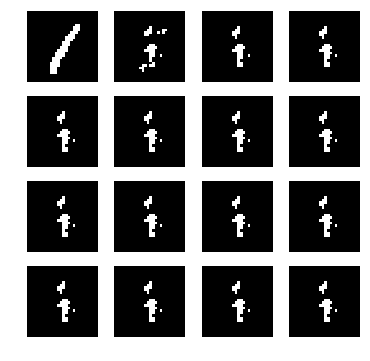

In [13]:
i=3
X = X_tr[i:i+1, :]
# X = np.sign(np.random.randn(*X.shape))
# X = np.sign(X_tr[0:1, :] + X_tr[1:2, :])
#X = X + np.random.randn(*X.shape)
plt.figure(figsize=(6,6))
for iter in range(16):
    plt.subplot(4,4,iter+1)
    utils.data_plot(X)
    X = model.inference(X)

(array([1.40000e+01, 6.02000e+02, 1.74480e+04, 2.30680e+04, 0.00000e+00,
        1.29002e+05, 6.08500e+04, 6.93140e+04, 0.00000e+00, 3.14358e+05]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

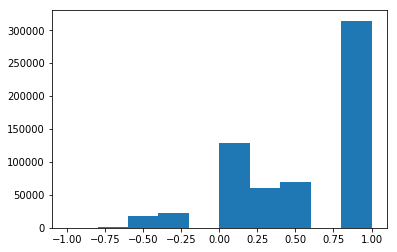

In [15]:
plt.hist(model.W.ravel())

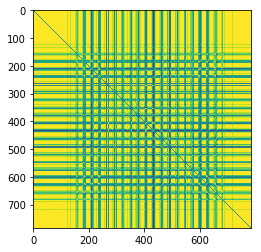

In [11]:
plt.imshow(model.W)

## Boltzmann Net with no Hidden Units (stachastic Hopfield Model)

In [4]:
import boltzmann_net_no_hidden

/shared/homes/sguan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


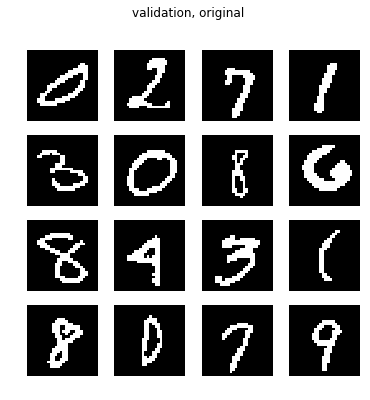

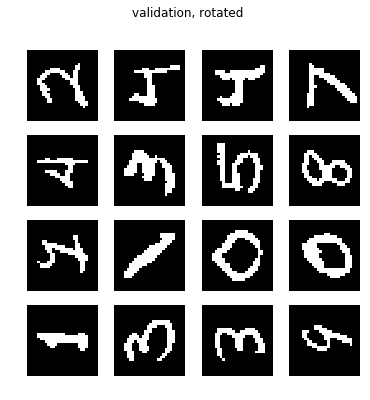

In [6]:
X_dvl_flp = X_dvl[:, :, ::-1]
X_dvl_rot = (np.rot90(X_dvl, k=1, axes=[1,2]))

X_tr = np.reshape(X_dtr, [X_dtr.shape[0], -1])
X_vl = np.reshape(X_dvl, [X_dvl.shape[0], -1])
X_vl_rot = np.reshape(X_dvl_rot, [X_dvl_rot.shape[0], -1])

X_tr = utils.data_binarize(X_tr, threshold=0.5, states='0,1')
X_vl = utils.data_binarize(X_vl, threshold=0.5, states='0,1')
X_vl_rot = utils.data_binarize(X_vl_rot, threshold=0.5, states='0,1')


utils.data_plot(X_vl, n=16)
plt.suptitle('validation, original')
plt.gcf().set_size_inches(6,6)


utils.data_plot(X_vl_rot, n=16)
plt.suptitle('validation, rotated')
plt.gcf().set_size_inches(6,6)

In [8]:
importlib.reload(utils)
importlib.reload(boltzmann_net_no_hidden)

<module 'boltzmann_net_no_hidden' from '/shared/homes/sguan/Coding_Projects/DynamicNN/boltzmann_net_no_hidden.py'>

In [9]:
model = boltzmann_net_no_hidden.BoltzmannNetNoHidden(X_tr.shape[1])

In [9]:
model.train(X=X_tr, lr=0.02, steps_negstats=2, batchsize=10, yn_verbose=True, batches_per_print=100)
model.save_parameters()


NameError: name 'model' is not defined

In [10]:
model.load_parameters()

loading model parameters from file ./model_save/BoltzmannNetNoHidden_20180525_164147.h5


In [11]:
E_tr = model.cal_energy(X_tr)
E_vl = model.cal_energy(X_vl)
E_vl_rot = model.cal_energy(X_vl_rot)

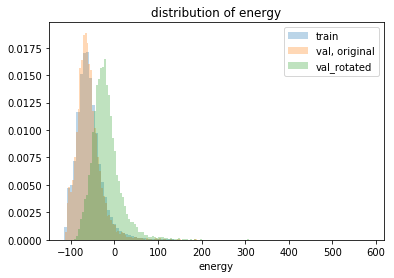

In [12]:
plt.figure(facecolor='w')
plt.hist(E_tr, bins=100, density=True, alpha=0.3)
plt.hist(E_vl, bins=100, density=True, alpha=0.3)
plt.hist(E_vl_rot, bins=100, density=True, alpha=0.3)
plt.xlabel('energy')
plt.title('distribution of energy')
plt.legend(['train', 'val, original', 'val_rotated'])

## random samples

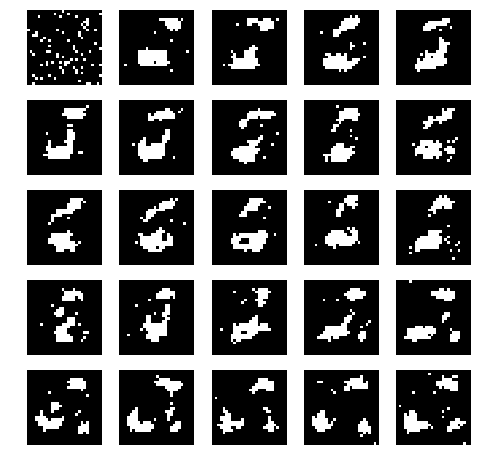

In [15]:
i = 4
X = (np.random.random((1, X_tr.shape[1]))<0.1)*1.0
plt.figure(figsize=(8, 8))
for iter in range(25):
    plt.subplot(5, 5, iter+1)
    utils.data_plot(X)
    for temp in range(10):
        X = model.inference(X)

## pattern completion

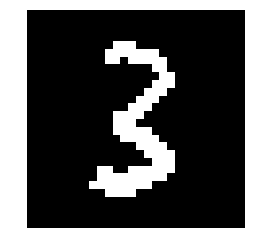

In [16]:
i = 0
X = X_vl[i:i+1, :]+0 
utils.data_plot(X)

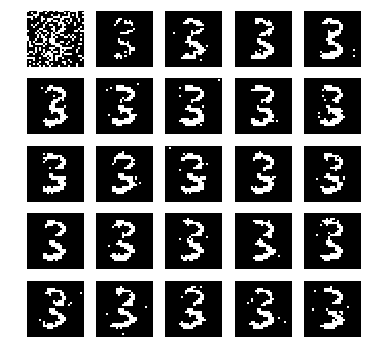

In [17]:


mask_visible = np.random.rand(1, X.shape[1]) < 0.5
X = np.where(mask_visible, X, np.random.rand(*X.shape) > 0.5)
plt.figure(figsize=(6, 6))
for iter in range(25):
    plt.subplot(5, 5, iter+1)
    utils.data_plot(X)
    for temp in range(1):
        X = model.inference(X, mask_update=1-mask_visible)

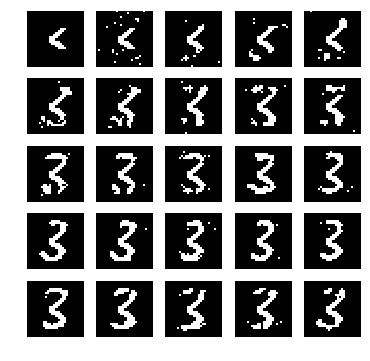

In [18]:

X = X_vl[i:i+1, :]+0
mask_visible = np.ones([1, X.shape[1]])
mask_visible[:, :9*28] = 0
mask_visible[:, 19*28:] = 0
X = X * mask_visible 
plt.figure(figsize=(6, 6))
for iter in range(25):
    plt.subplot(5, 5, iter+1)
    utils.data_plot(X)
    for temp in range(2):
        X = model.inference(X, mask_update=1-mask_visible)

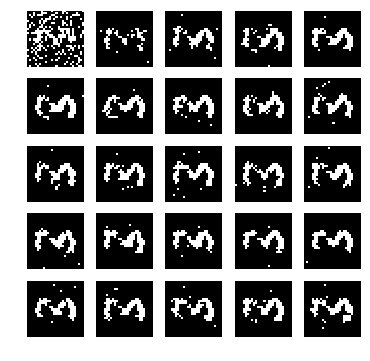

In [19]:

X = X_vl_rot[i:i+1, :]+0 
mask_visible = np.random.rand(1, X.shape[1]) < 0.5
X = np.where(mask_visible, X, np.random.rand(*X.shape) > 0.5)
plt.figure(figsize=(6, 6))
for iter in range(25):
    plt.subplot(5, 5, iter+1)
    utils.data_plot(X)
    for temp in range(1):
        X = model.inference(X, mask_update=1-mask_visible)

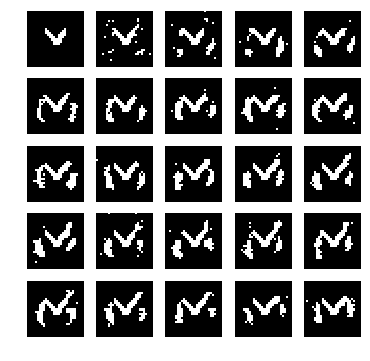

In [20]:

X = X_vl_rot[i:i+1, :]+0
mask_visible = np.ones([1, X.shape[1]])
mask2D = np.ones([28, 28])
mask2D[:, :9] = 0
mask2D[:, 19:] = 0
mask_visible[0, :] = mask2D.ravel()
X = X * mask_visible 
plt.figure(figsize=(6, 6))
for iter in range(25):
    plt.subplot(5, 5, iter+1)
    utils.data_plot(X)
    for temp in range(2):
        X = model.inference(X, mask_update=1-mask_visible)

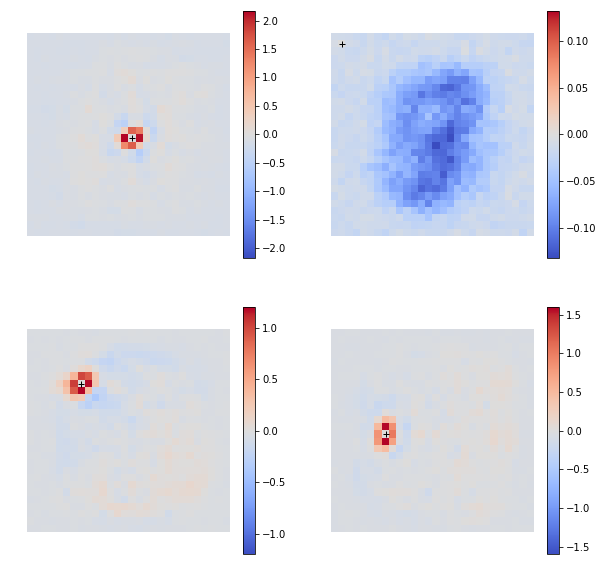

In [21]:
def plot_W_from_pixel(model, i, j):
    H = int(np.sqrt(model.W.shape[0]))
    W = H
    
    toplot = model.W[i*H+j:i*H+j+1, :]
    utils.data_plot(toplot)
    climabs = np.abs(toplot).max()
    plt.clim(-climabs, climabs)
    plt.set_cmap('coolwarm')
    plt.colorbar()
    plt.plot(j, i, 'k+')

list_pixel_from = [(14, 14), (1, 1), (7, 7), (14, 7)]

h_fig, h_axes = utils.subplots_autorc(len(list_pixel_from), figsize=(10, 10), facecolor='white')
for i_pixel, (i, j) in enumerate(list_pixel_from):
    plt.axes(h_axes[i_pixel])
    plot_W_from_pixel(model, i, j)


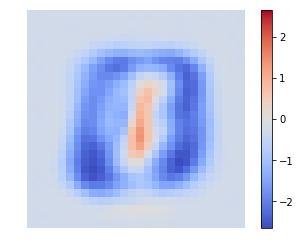

In [22]:
plt.figure(facecolor='white')
toplot = model.b

utils.data_plot(toplot)
climabs = np.abs(toplot).max()
plt.clim(-climabs, climabs)
plt.set_cmap('coolwarm')
plt.colorbar()


# study the dynamics of stochastic Hopfield model

In [23]:
n_samples = 100
t_total = 100

X = X_vl[:n_samples, :] + 0 
mask_visible = np.random.rand(1, X.shape[1]) < 0.5
X = np.where(mask_visible, X, np.random.rand(*X.shape) > 0.5)

X_dyn = np.zeros(X.shape + (t_total, ))
E_dyn = np.zeros((X.shape[0], t_total))

for t in range(t_total):
    for temp in range(1):
        X_dyn[:, :, t] = X
        E_dyn[:, t] = model.cal_energy(X)
        X = model.inference(X, mask_update=1-mask_visible)

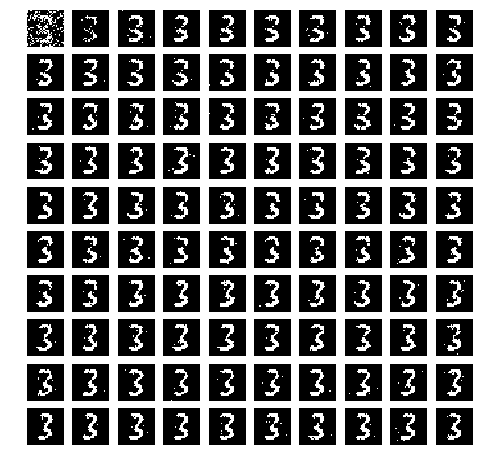

In [25]:
i_sample = 0
utils.data_plot(X_dyn[i_sample, :, :].transpose(), i=range(n_samples))
plt.gcf().set_size_inches(8,8)
plt.show()

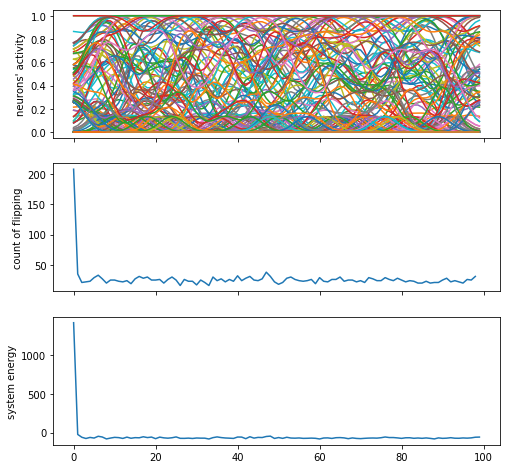

In [31]:

h_fig, h_axes = plt.subplots(3, 1, figsize=(8, 8), facecolor='w', sharex='all')
h_axes = np.ravel(h_axes)
plt.axes(h_axes[0])
plt.plot(ndimage.gaussian_filter1d(X_dyn[i_sample, np.logical_not(mask_visible[0, :]), :].transpose(), sigma=3, axis=0))
plt.ylabel("neurons' activity")
plt.axes(h_axes[1])
plt.plot(np.sum(np.abs(np.diff(X_dyn[i_sample, :, :], axis=-1)), axis=0))
plt.ylabel("count of flipping")
plt.axes(h_axes[2])
plt.plot(E_dyn[i_sample, :])
plt.ylabel("system energy")
plt.show()

## some statistics

In [27]:
n_samples = 100
t_total = 49
# mask_mode = 'intact'
# mask_mode = 'random'
# mask_mode = 'section'
mask_mode = 'checkerboard'

X_fam = X_vl[:n_samples, :] + 0
X_nov = X_vl_rot[:n_samples, :] + 0

if mask_mode == 'intact':
    mask2D = np.ones([28, 28])
elif mask_mode == 'random':
    mask2D = np.ones([28, 28])
    mask_prop_vis = 0.5
    mask2D = np.random.random([28, 28]) < mask_prop_vis
elif mask_mode == 'section':
    mask2D = np.zeros([28, 28])
    mask2D[:11, :] = 1
    mask2D[18:, :] = 1
elif mask_mode == 'checkerboard':
    mask2D = np.ones([28, 28])
    mask2D[np.arange(28)%6 < 2, :] = 0
    mask2D[:, np.arange(28)%6 < 2] = 0
else:
    raise Exception('mask_mode is illegal')

mask_visible_fam = mask2D.ravel()[None, :]
mask_visible_nov = np.rot90(mask2D).ravel()[None, :]

def get_X_dyn(X, mask_visible, t_total=t_total):
    
    X_cur = np.where(mask_visible, X, np.random.random(X.shape) < np.mean(X))
    
    X_dyn = np.zeros(X.shape + (t_total, ))
    E_dyn = np.zeros((X.shape[0], t_total))
    
    for t in range(t_total):
        for temp in range(1):
            X_dyn[:, :, t] = X_cur
            E_dyn[:, t] = model.cal_energy(X_cur)
            if mask_mode == 'intact':
                mask_update = None
            else:
                mask_update = 1-mask_visible
            X_cur = model.inference(X_cur, mask_update=mask_update)
    return X_dyn, E_dyn

X_dyn_fam, E_dyn_fam = get_X_dyn(X_fam, mask_visible_fam)
X_dyn_nov, E_dyn_nov = get_X_dyn(X_nov, mask_visible_nov)

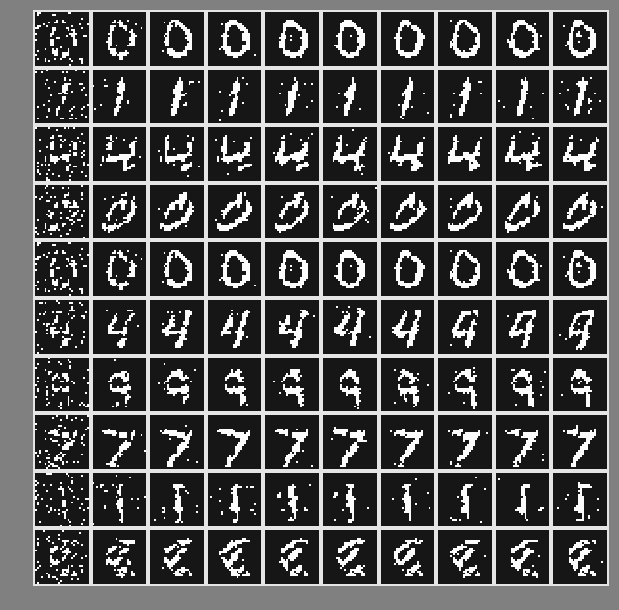

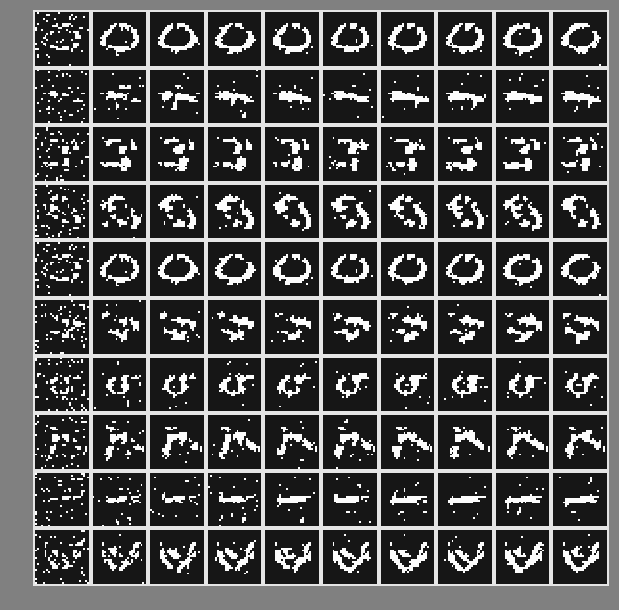

In [28]:
num_examples = 10
i_examples = np.random.choice(X_dyn.shape[0], size=num_examples)
t_examples = range(0, 20, 2)

plt.close('all')

importlib.reload(utils)

def plot_example_dynamics(X_dyn, i_examples=None, t_examples=None, X_true=None):
    if i_examples is None:
        i_examples = np.random.choice(X_dyn.shape[0], size=10)
    if t_examples is None:
        t_examples = np.arange(0, X_dyn.shape[2], X_dyn.shape[2]//10)
    
    X_plot = []
    
    for i, i_example in enumerate(i_examples):
        for j, t_example in enumerate(t_examples):
            X_plot.append(utils.data_unravel(X_dyn[i_example, :, t_example]))
    plt.figure(figsize=(8,8), facecolor='gray')
    utils.imshow_fast_subplot(X_plot, cmap='gray')


plot_example_dynamics(X_dyn_fam, i_examples, t_examples)
plot_example_dynamics(X_dyn_nov, i_examples, t_examples)


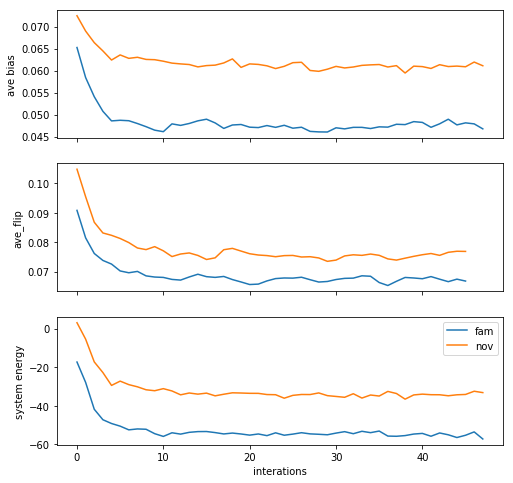

In [46]:
def plot_dyn_stats(X_dyn, X_true, E_dyn, mask_visible, h_axes=None):
    if h_axes is None:
        h_fig, h_axes = plt.subplots(3, 1, figsize=(8, 8), facecolor='w', sharex='all')
        h_axes = np.ravel(h_axes)
    plt.axes(h_axes[0])
    plt.plot(np.mean(np.mean(np.abs(X_dyn[:, :, :]-X_true[:, :, None]), axis=1), axis=0)[1:])
    plt.ylabel("ave bias")
    plt.axes(h_axes[1])
    interval = 1
    plt.plot(np.mean(np.mean(np.abs(np.diff(X_dyn[:, :, :-interval]-X_dyn[:, :, interval:],  axis=-1)), axis=1), axis=0)[1:])
    plt.ylabel("ave_flip")
    plt.axes(h_axes[2])
    plt.plot(np.mean(E_dyn, axis=0)[1:])
    plt.ylabel("system energy")
    plt.xlabel('interations')


h_fig, h_axes = plt.subplots(3, 1, figsize=(8, 8), facecolor='w', sharex='all')
h_axes = np.ravel(h_axes)
plot_dyn_stats(X_dyn_fam, X_fam, E_dyn_fam, mask_visible_fam, h_axes=h_axes)
plot_dyn_stats(X_dyn_nov, X_nov, E_dyn_nov, mask_visible_nov, h_axes=h_axes)
plt.legend(['fam', 'nov'])
plt.show()

## put together

random


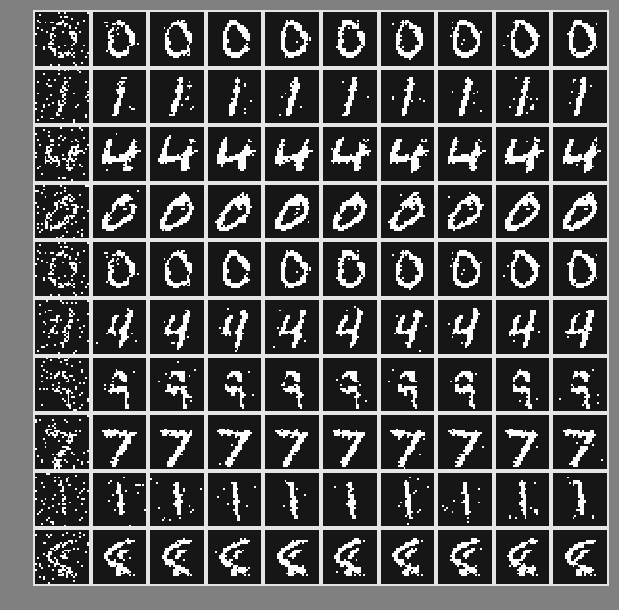

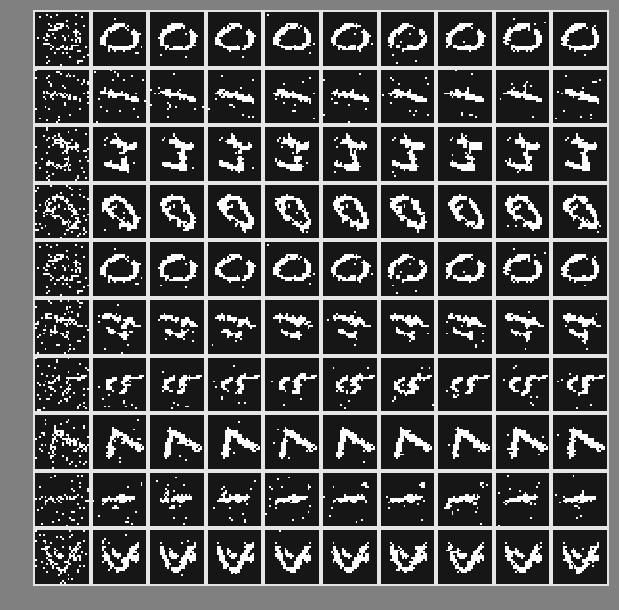

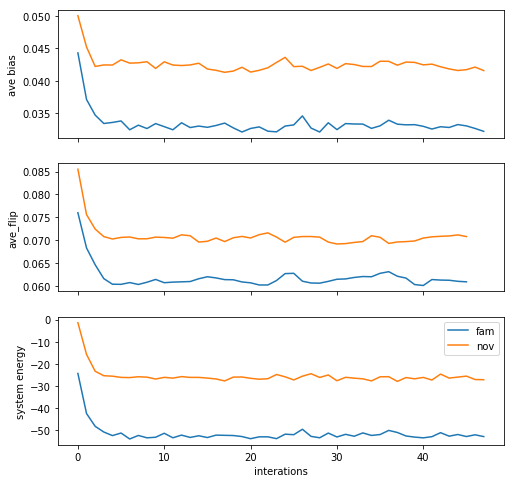

checkerboard


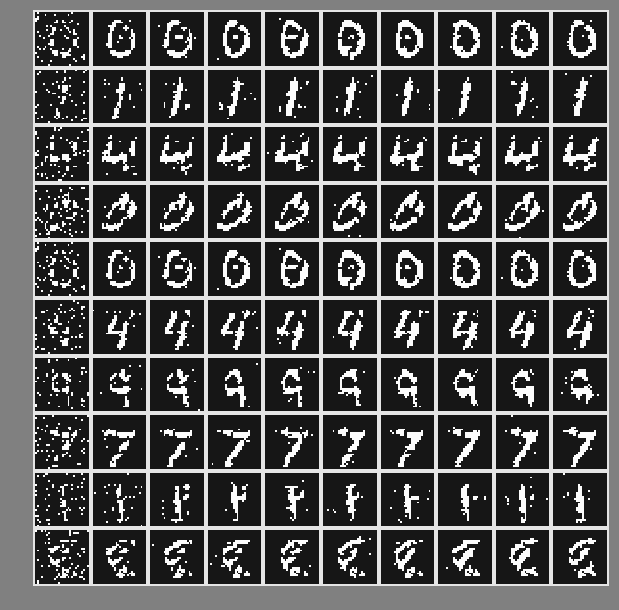

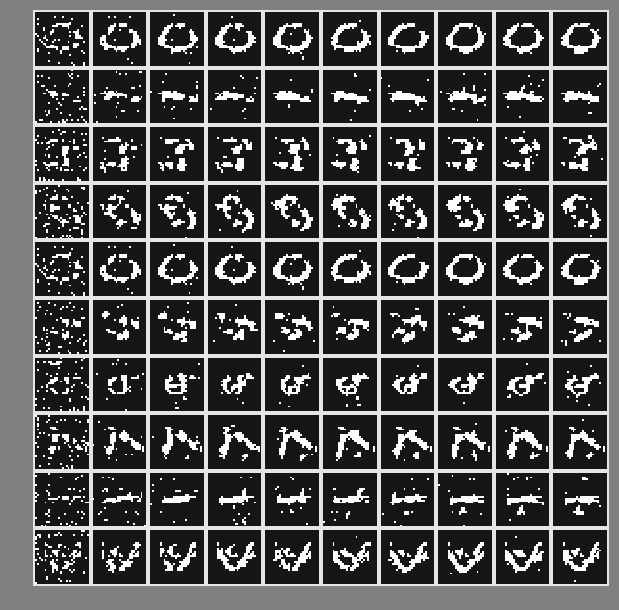

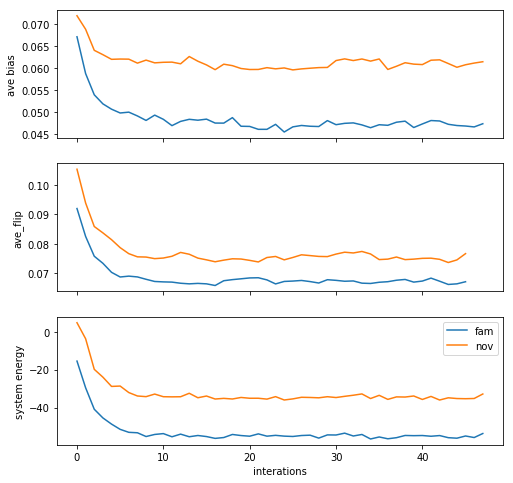

section


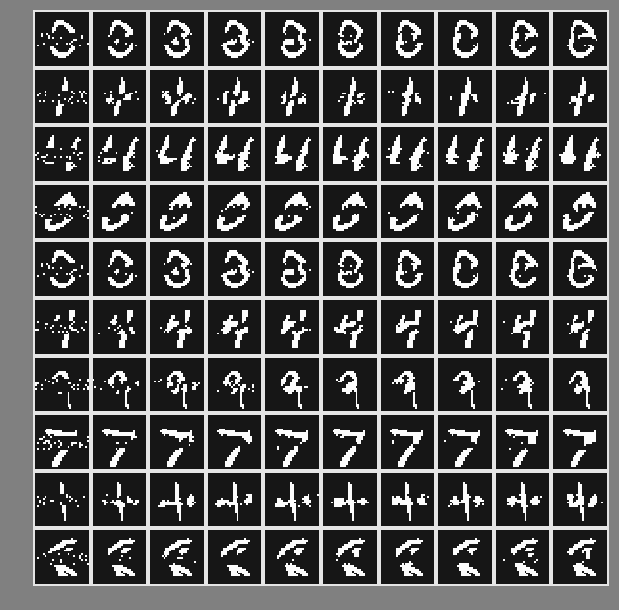

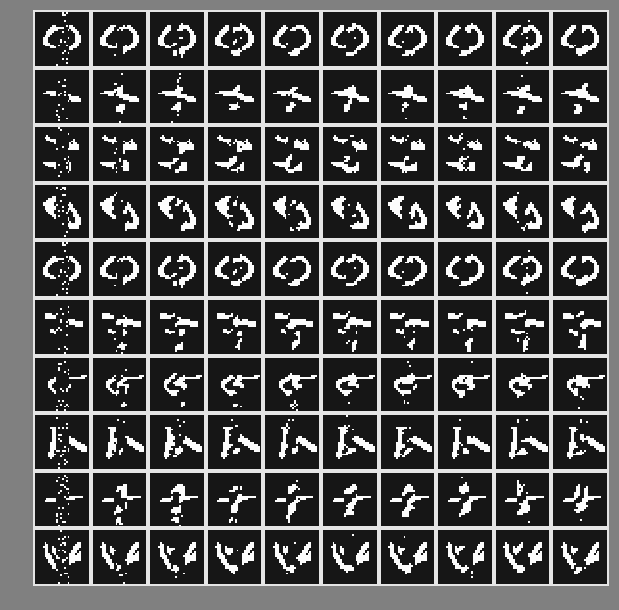

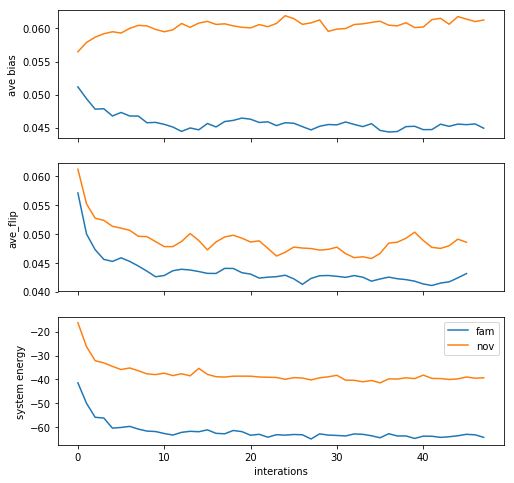

In [48]:
def plot_dynamics(mask_mode):
    n_samples = 100
    t_total = 49
    # mask_mode = 'intact'
    # mask_mode = 'random'
    # mask_mode = 'section'
    # mask_mode = 'checkerboard'
    
    X_fam = X_vl[:n_samples, :] + 0
    X_nov = X_vl_rot[:n_samples, :] + 0
    
    if mask_mode == 'intact':
        mask2D = np.ones([28, 28])
    elif mask_mode == 'random':
        mask_prop_vis = 0.5
        mask2D = np.random.random([28, 28]) < mask_prop_vis
    elif mask_mode == 'section':
        mask2D = np.zeros([28, 28])
        mask2D[:11, :] = 1
        mask2D[18:, :] = 1
    elif mask_mode == 'checkerboard':
        mask2D = np.ones([28, 28])
        mask2D[np.arange(28)%6 < 2, :] = 0
        mask2D[:, np.arange(28)%6 < 2] = 0
    else:
        raise Exception('mask_mode is illegal')
    
    mask_visible_fam = mask2D.ravel()[None, :]
    mask_visible_nov = np.rot90(mask2D).ravel()[None, :]
    
    
    X_dyn_fam, E_dyn_fam = get_X_dyn(X_fam, mask_visible_fam, t_total=t_total)
    X_dyn_nov, E_dyn_nov = get_X_dyn(X_nov, mask_visible_nov, t_total=t_total)
    
    plot_example_dynamics(X_dyn_fam, i_examples, t_examples)
    plot_example_dynamics(X_dyn_nov, i_examples, t_examples)

    h_fig, h_axes = plt.subplots(3, 1, figsize=(8, 8), facecolor='w', sharex='all')
    h_axes = np.ravel(h_axes)
    plot_dyn_stats(X_dyn_fam, X_fam, E_dyn_fam, mask_visible_fam, h_axes=h_axes)
    plot_dyn_stats(X_dyn_nov, X_nov, E_dyn_nov, mask_visible_nov, h_axes=h_axes)
    plt.legend(['fam', 'nov'])
    
    plt.show()


list_mask_mode = ['random', 'checkerboard', 'section']
for mask_mode in list_mask_mode:
    print(mask_mode)
    plot_dynamics(mask_mode=mask_mode)
plt.close('all')

0.9


0.7


0.5


0.3


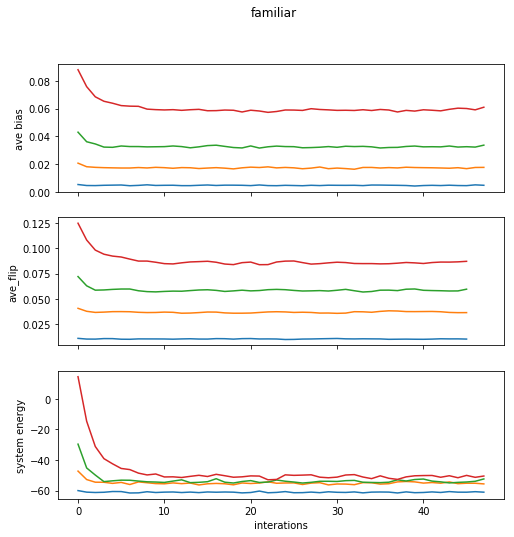

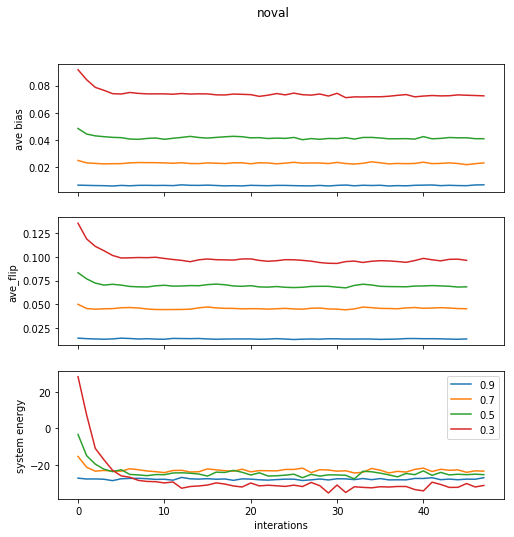

In [49]:

def plot_dynamics(mask_prop_vis=0.5, h_axes_set=None):
    n_samples = 100
    t_total = 49
    # mask_mode = 'intact'
    # mask_mode = 'random'
    # mask_mode = 'section'
    # mask_mode = 'checkerboard'
    
    X_fam = X_vl[:n_samples, :] + 0
    X_nov = X_vl_rot[:n_samples, :] + 0
    
    mask2D = np.random.random([28, 28]) < mask_prop_vis
    
    mask_visible_fam = mask2D.ravel()[None, :]
    mask_visible_nov = np.rot90(mask2D).ravel()[None, :]
    
    X_dyn_fam, E_dyn_fam = get_X_dyn(X_fam, mask_visible_fam, t_total=t_total)
    X_dyn_nov, E_dyn_nov = get_X_dyn(X_nov, mask_visible_nov, t_total=t_total)
    
    # plot_example_dynamics(X_dyn_fam, i_examples, t_examples)
    # plot_example_dynamics(X_dyn_nov, i_examples, t_examples)
    
    plot_dyn_stats(X_dyn_fam, X_fam, E_dyn_fam, mask_visible_fam, h_axes=h_axes_set[0])
    plot_dyn_stats(X_dyn_nov, X_nov, E_dyn_nov, mask_visible_nov, h_axes=h_axes_set[1])
    # plt.legend(['fam', 'nov'])
    


h_fig, h_axes0 = plt.subplots(3, 1, figsize=(8, 8), facecolor='w', sharex='all')
plt.suptitle('familiar')
h_fig, h_axes1 = plt.subplots(3, 1, figsize=(8, 8), facecolor='w', sharex='all')
plt.suptitle('noval')
h_axes0 = np.ravel(h_axes0)
h_axes1 = np.ravel(h_axes1)
list_mask_prop_vis = [0.9, 0.7, 0.5, 0.3]
for mask_prop_vis in list_mask_prop_vis:
    print(mask_prop_vis)
    plot_dynamics(mask_prop_vis=mask_prop_vis, h_axes_set=[h_axes0, h_axes1])
plt.legend(list_mask_prop_vis)
plt.show()
plt.close('all')

# RBM

In [88]:
import rbm

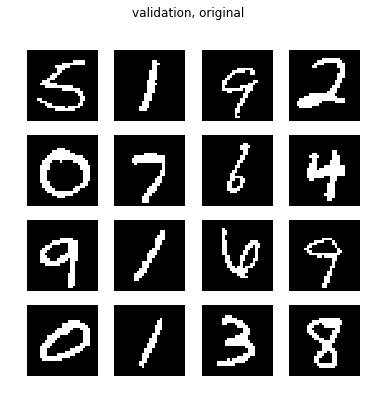

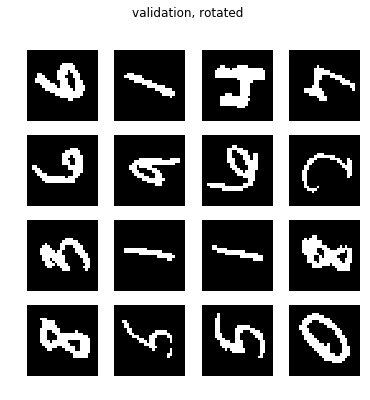

In [89]:
X_dvl_flp = X_dvl[:, :, ::-1]
X_dvl_rot = (np.rot90(X_dvl, k=1, axes=[1,2]))

X_tr = np.reshape(X_dtr, [X_dtr.shape[0], -1])
X_vl = np.reshape(X_dvl, [X_dvl.shape[0], -1])
X_vl_rot = np.reshape(X_dvl_rot, [X_dvl_rot.shape[0], -1])

X_tr = utils.data_binarize(X_tr, threshold=0.5, states='0,1')
X_vl = utils.data_binarize(X_vl, threshold=0.5, states='0,1')
X_vl_rot = utils.data_binarize(X_vl_rot, threshold=0.5, states='0,1')


utils.data_plot(X_vl, n=16)
plt.suptitle('validation, original')
plt.gcf().set_size_inches(6,6)


utils.data_plot(X_vl_rot, n=16)
plt.suptitle('validation, rotated')
plt.gcf().set_size_inches(6,6)

In [90]:
importlib.reload(rbm)
model = rbm.RestrictedBoltzmannMachine(m1=X_tr.shape[1], m2=128)

In [158]:
for num_over_all_data in range(10):
    model.train(X=X_tr, lr=0.02, steps_negstats=2, batchsize=64, yn_verbose=True, batches_per_print=500)
model.save_parameters()

batch 0/781, time total=0 sec, energy_tr=-295.38134289263803


batch 500/781, time total=91 sec, energy_tr=-288.9484365673213


batch 0/781, time total=0 sec, energy_tr=-300.1620581294128


batch 500/781, time total=91 sec, energy_tr=-293.48251232209145


batch 0/781, time total=0 sec, energy_tr=-305.9620205423108


batch 500/781, time total=91 sec, energy_tr=-298.5621380352323


batch 0/781, time total=0 sec, energy_tr=-309.84933351535517


batch 500/781, time total=91 sec, energy_tr=-303.1980858263203


batch 0/781, time total=0 sec, energy_tr=-314.92930664143717


batch 500/781, time total=91 sec, energy_tr=-309.2535116187105


batch 0/781, time total=0 sec, energy_tr=-319.9574510398073


batch 500/781, time total=91 sec, energy_tr=-314.0444667152768


batch 0/781, time total=0 sec, energy_tr=-324.6298738945951


batch 500/781, time total=91 sec, energy_tr=-318.051853084313


batch 0/781, time total=0 sec, energy_tr=-329.21052754360244


batch 500/781, time total=91 sec, energy_tr=-323.6042245385275


batch 0/781, time total=0 sec, energy_tr=-333.5706649447544


batch 500/781, time total=91 sec, energy_tr=-328.5488032833377


batch 0/781, time total=0 sec, energy_tr=-339.1234925289564


batch 500/781, time total=91 sec, energy_tr=-331.96518099946104


save model parameters to file ./model_save/RBM_20180615_112719.h5


In [106]:
model.load_parameters()

loading model parameters from file ./model_save/RBM_20180614_145414.h5


In [107]:
E_tr = model.cal_energy(X_tr)
E_vl = model.cal_energy(X_vl)
E_vl_rot = model.cal_energy(X_vl_rot)

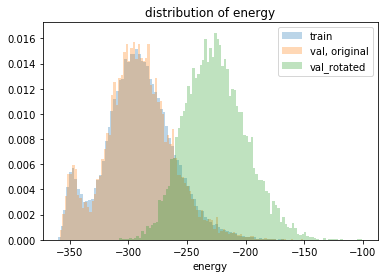

In [157]:
plt.figure(facecolor='w')
plt.hist(E_tr, bins=100, density=True, alpha=0.3)
plt.hist(E_vl, bins=100, density=True, alpha=0.3)
plt.hist(E_vl_rot, bins=100, density=True, alpha=0.3)
plt.xlabel('energy')
plt.title('distribution of energy')
plt.legend(['train', 'val, original', 'val_rotated'])

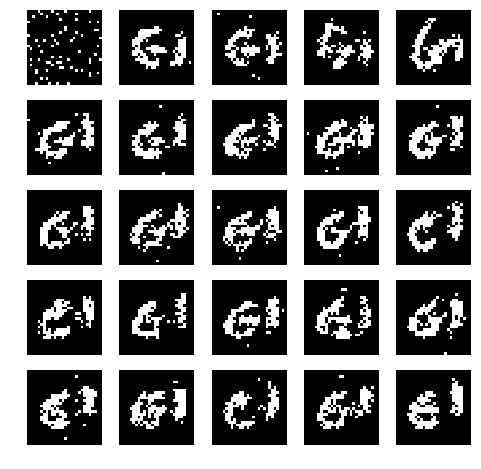

In [148]:
i = 4
X = (np.random.random((1, X_tr.shape[1]))<0.1)*1.0
plt.figure(figsize=(8, 8))
for iter in range(25):
    plt.subplot(5, 5, iter+1)
    utils.data_plot(X)
    for temp in range(100):
        (X, Y), _ = model.inference(X, num_steps=2)

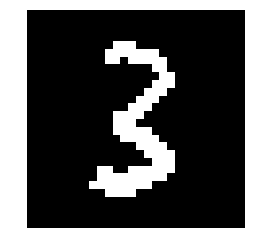

In [150]:
i = 0
X = X_vl[i:i+1, :]+0 
utils.data_plot(X)

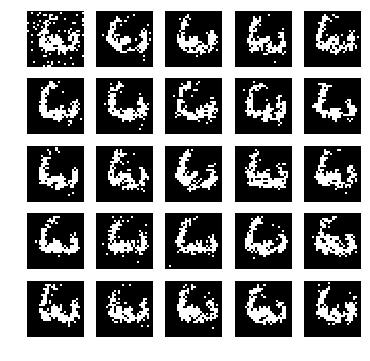

In [154]:


mask_visible = np.random.rand(1, X.shape[1]) < 0.90
X = np.where(mask_visible, X, np.random.rand(*X.shape) > 0.1)
plt.figure(figsize=(6, 6))
for iter in range(25):
    plt.subplot(5, 5, iter+1)
    utils.data_plot(X)
    for temp in range(10):
        (X, Y), _ = model.inference(X, mask_update=1-mask_visible, num_steps=2)

Exception: input dimension not right, please specify r (num of rows)

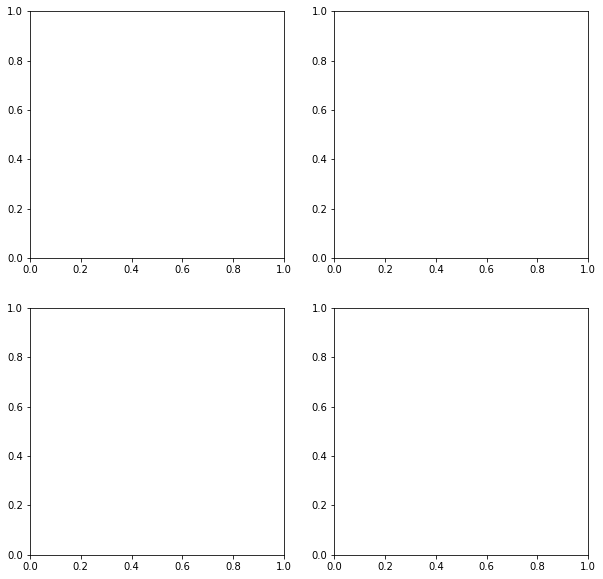

In [155]:
def plot_W_from_pixel(model, i, j):
    H = int(np.sqrt(model.W.shape[0]))
    W = H
    
    toplot = model.W[i*H+j:i*H+j+1, :]
    utils.data_plot(toplot)
    climabs = np.abs(toplot).max()
    plt.clim(-climabs, climabs)
    plt.set_cmap('coolwarm')
    plt.colorbar()
    plt.plot(j, i, 'k+')

list_pixel_from = [(14, 14), (1, 1), (7, 7), (14, 7)]

h_fig, h_axes = utils.subplots_autorc(len(list_pixel_from), figsize=(10, 10), facecolor='white')
for i_pixel, (i, j) in enumerate(list_pixel_from):
    plt.axes(h_axes[i_pixel])
    plot_W_from_pixel(model, i, j)